In [34]:
from matplotlib import pyplot as pyp
import numpy as np

$Pregunta 1:$

Cargamos los datos en una lista, para poder trabajar con estos

In [35]:
#leemos el archivo con los datos y lo guardamos en la lista de listas vectores
vectores = list()
ruta = "P1grupo_8.csv"
with open(ruta, "r") as archivo:
    archivo = archivo.readlines()[1:]
    for dato in archivo:
        dato = dato.rstrip("\n")
        dato = dato.split(",")
        x = float(dato[0])
        y = float(dato[1])
        vectores.append((x,y))



Aplique el método de optimización visto en el curso con que resolvimos el problema de regresión
lineal.

Deduzca la fórmula para encontrar los coeficientes a partir de los datos.

Ahora creamos la matriz A y el vector b, siguiendo lo trabajado en clases, para minimizar una funcion de la forma ${||Ax - b||_2}^2$

In [36]:
#creamos la matriz A y el vector b
A = []
b = []
for vector in vectores:
    x = vector[0]
    X_n = [x ** 2, x, 1]
    A.append(X_n)

    Y_n = vector[1]
    b.append(Y_n)

A = np.array(A) #Matriz 1000x3
b = np.array(b) #vector largo 1000

Usamos $f(x) = {||Ax - b||_2}^2$ y buscamos minimizar $f: {R}^{3} \longrightarrow R$.

Vemos que $f = g \circ h$.

con $h: R^{3} \longrightarrow R^{1000}$ : $x \longmapsto{Ax-b}$

y $g: R^{1000} \longrightarrow R$ : $x \longmapsto{||x||_2}^2$

 Por regla de la cadena: $\nabla{f(x)} = \nabla{g(h(x))} Dh(x)$

 Tenemos que $\nabla{g(x)} = 2x^T$ $\wedge$ $Dh(x) = A$

 Por tanto, $\nabla{f(x)} = 2(Ax-b)^TA$

 Buscamos $\nabla{f(x)} = 0$ para hallar el mínimo, por lo que buscamos $(Ax-b)^TA = 0$

 Como $A^T \in M_{3x1000}$ y $A \in M_{1000x3}$, entonces $A^TA \in M_{3x3}$ y por tanto es invertible.

 Sabiendo esto llegamos a que $x = (A^TA)^{-1}A^Tb$

 Implementamos este proceso computacional utilizando la matriz A y el vector b previamente creado:

 

In [37]:
AT = A.transpose()
ATA = AT.dot(A)
ATA_inv = np.linalg.inv(ATA)
x = ATA_inv.dot(A.T)
x = x.dot(b)
B_2 = x[0]
B_1 = x[1]
B_0 = x[2]
r = f"Los coeficientes β_0 , β_1 , β_2, son respectivamente{B_0}, {B_1}, {B_2}"



Encuentre los valores de $β_0 , β_1 , β_2$ ∈ R buscados.

In [38]:
r = f"Los coeficientes β_0 , β_1 , β_2, son respectivamente{B_0}, {B_1}, {B_2}"
r

'Los coeficientes β_0 , β_1 , β_2, son respectivamente2.498710871255255, 0.0966976598491917, 0.3259576974094266'

siendo x los coeficientes que necesitamos para nuestra regresión cuadrática, podemos ahora graficar.

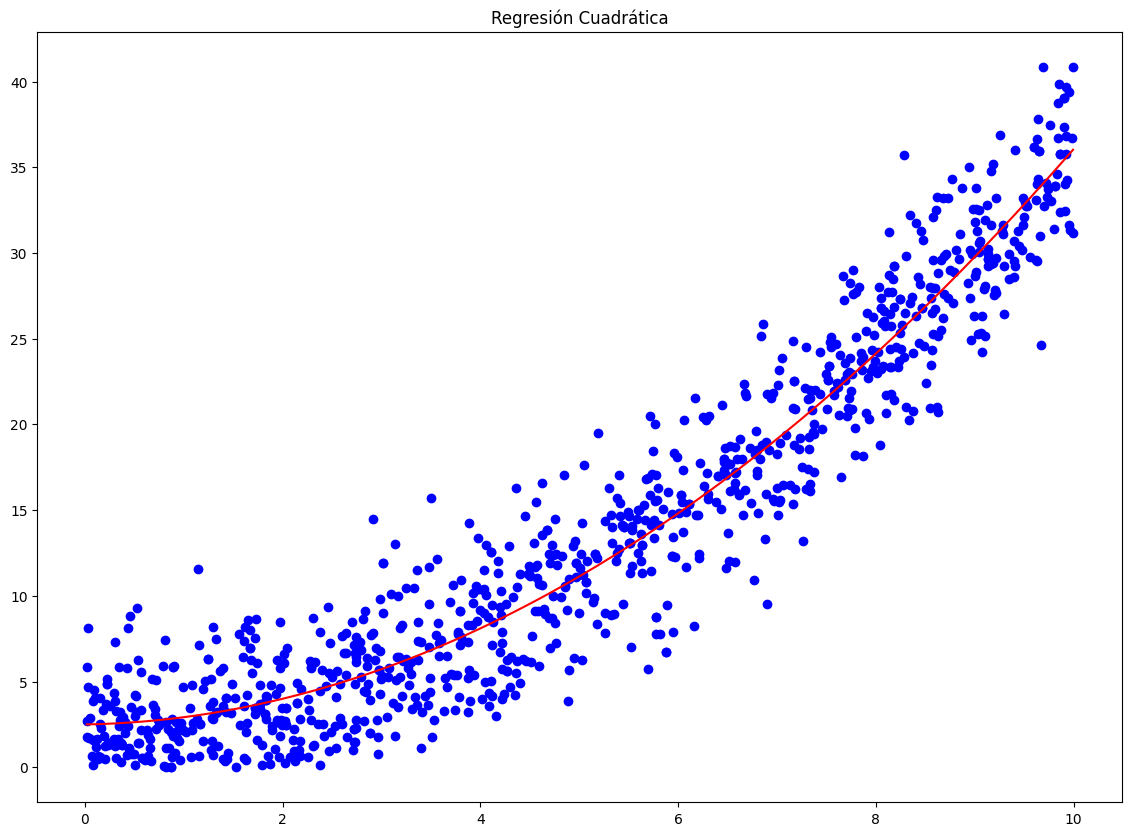

In [39]:
x_vec = [vector[0] for vector in vectores]
x_vec = np.array(x_vec)

fig, ax = pyp.subplots(1, 1, figsize = (14, 10))
ax.set_title("Regresión Cuadrática")


ax.scatter(x_vec, b, marker = "o", color = "blue")

ax.plot(x_vec, A.dot(x), 'red' )

$Pregunta 2:$

Cargamos los datos en una lista para poder trabajarlos

In [40]:
#separar los datos en una lista de listas en donde
#cada lista contiene una lista con los elementos de entrada y al elemento de salida
puntos = list()
with open("P2grupo_8.csv", "r") as archivo:
    contenido = archivo.readlines()[1:]
    for linea in contenido:
        linea = linea.rstrip("\n")
        linea = linea.split(",")
        for i in range(len(linea)):
            linea[i] = float(linea[i])
        puntos.append([[linea[0], linea[1], linea[2]], linea[3]])
            

Considere la función de activación sigmoide
$σ(t) = \frac{1}{1 + {e}^{-t}}$
y encuentre una expresión para su derivada $σ\prime$(t).

Esto lo podemos resolver utilizando la derivación por cociente:

$σ\prime$(t) = $\frac{0 * {e}^{-t} -({e}^{-t})\prime *1} {(1 + {e}^{-t})^2} $ 

$σ\prime$(t) = $-\frac{{e}^{-t}*-1} {(1 + {e}^{-t})^2} $ 

$σ\prime$(t) = $\frac{{e}^{t}} {({e}^{t} + 1)^2} $ 

Considerando los datos de entrenamiento (ui , vi , wi , zi ) ∈ $R^4$ construya J = J(a, b, c, d, e, f ) la
función de pérdida del error cuadrático medio, como vimos en el ejemplo del curso, y calcule
explı́citamente su gradiente en un punto cualquiera (a, b, c, d, e, f ) ∈ $R^6$ .